In [1]:
import uproot
import awkward
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import ROOT
import random

Welcome to JupyROOT 6.26/06


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [223]:
fileName = 'output0.root'
treeName = 'Hits;1'

d = ROOT.RDataFrame(treeName, fileName)    

    
def ReadDataFrame(dataframe, label,cut=''):
    #dataframe=dataframe.Filter(cut)
    data= dataframe.AsNumpy(columns=[label])
    return data[label] 

branchname='edep'
edep= ReadDataFrame(d, branchname, '')
branchname='X'
X= ReadDataFrame(d, branchname, '')
branchname='Y'
Y= ReadDataFrame(d, branchname, '')
branchname='Z'
Z= ReadDataFrame(d, branchname, '')
branchname='time'
time= ReadDataFrame(d, branchname, '')
branchname='pdg'
pdg= ReadDataFrame(d, branchname, '')



photonstreeName = 'Photons;1'

d_photons = ROOT.RDataFrame(photonstreeName, fileName)   


branchname='fVertexX'
X_photons= ReadDataFrame(d_photons, branchname, '')
branchname='fVertexY'
Y_photons= ReadDataFrame(d_photons, branchname, '')
branchname='fVertexZ'
Z_photons= ReadDataFrame(d_photons, branchname, '')

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0., 88312.,
            0.,   100.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 13173.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 [<matplotlib.patches.Polygon at 0x148f0c8e0>])

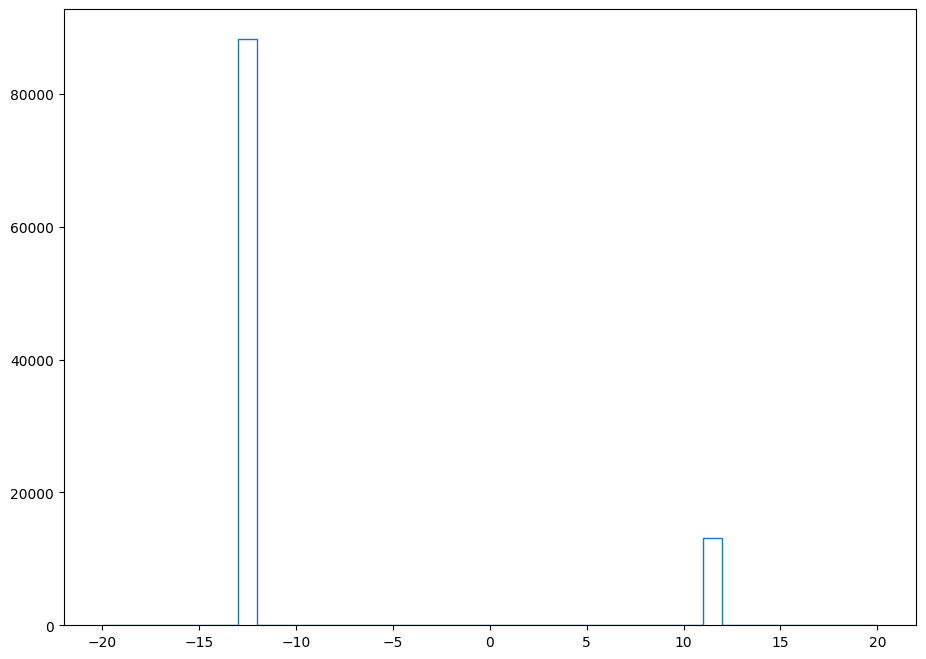

In [228]:
fig, ax = plt.subplots(1,figsize=(11,8))
ax.hist(pdg, histtype='step', range=[-20,20], bins=40)

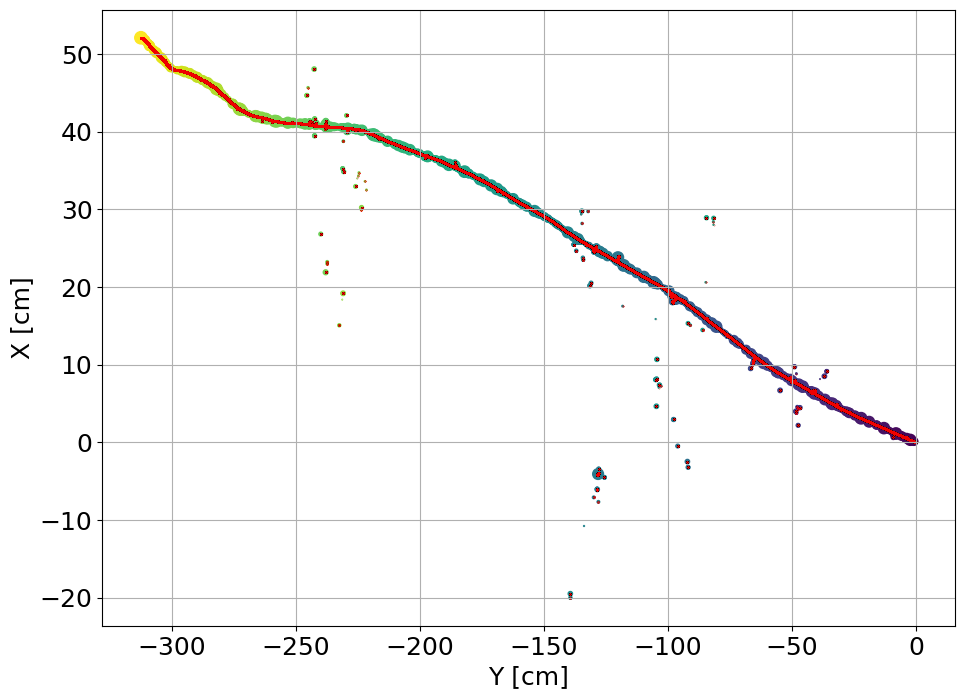

In [224]:
fig, ax = plt.subplots(figsize=(11,8))

ax.scatter(Z,X, s=edep*200, c=time)
#ax.scatter(X_photons,Z_photons, s=2)

ax.scatter(Z_photons,X_photons, s=0.002, c='red')
#ax.scatter(X_photons_unlim,Z_photons_unlim, s=2)
ax.set_ylabel('X [cm]', fontsize=18)
ax.set_xlabel('Y [cm]', fontsize=18)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=18)



In [200]:
for num in range(0,len(X)-1):
    steplength = np.sqrt( (X[num]-X[num+1])**2+(Y[num]-Y[num+1])**2+(Z[num]-Z[num+1])**2 )
    print(steplength)

0.0049995414651080455
0.004999537606589214
0.004999533982115695
0.0049995309386014625
0.004999528342774142
0.00499952314249305
0.004999520138686268
0.0049995176814851446
0.004999511297626399
0.0049995061678205
0.004999503257917419
0.004999499976068412
0.004999485072048362
0.004999479608373375
0.004999474822698037
0.004999471941056475
0.004999467393716336
0.004999463585283962
0.0049994594270668475
0.0049994554921655564
0.004999452474178909
0.004999449019334334
0.004999445018766949
0.004999439666138206
0.004999434984668679
0.004997985272310528
0.00499942675663408
0.004999422280076817
0.0049994180684696035
0.00499941258139393
0.0049994064794011365
0.004999401785229995
0.0049993972150198535
0.004999392707419153
0.004998837456267749
0.004999382268881139
0.004999377940725499
0.004999371417144956
0.004999366071470258
0.004999360668796221
0.004999356141478045
0.0049993514606647025
0.00499934489626451
0.00499934027786318
0.004999326068713017
0.004999321107157368
0.004999314622542732
0.004999307

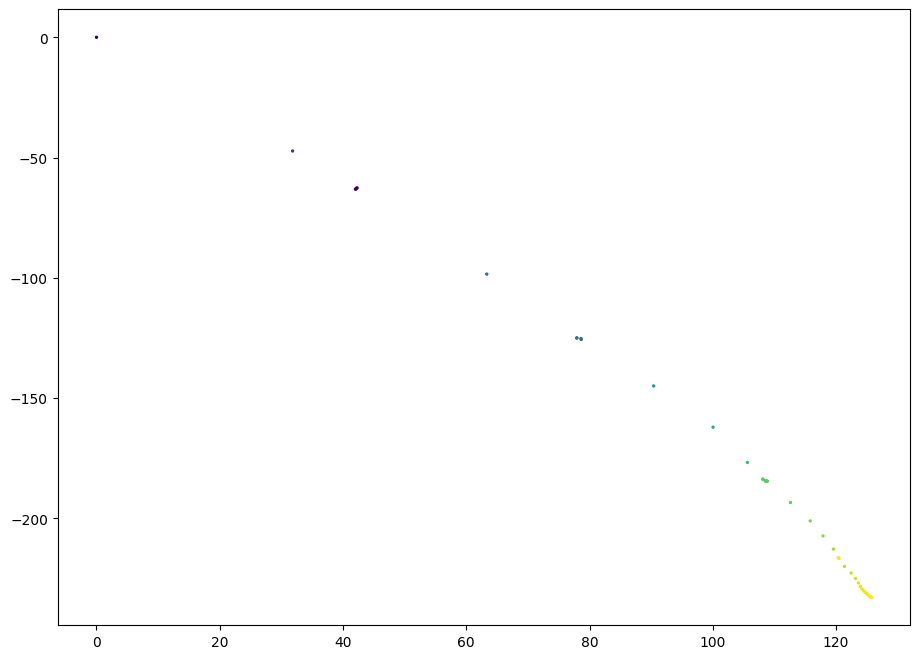

In [88]:
X_muon=[]
Y_muon=[]
Z_muon=[]
edep_muon=[]
time_muon=[]
X_e=[]
Y_e=[]
Z_e=[]
edep_e=[]
time_e=[]

for num in range(len(X)):
    if(pdg[num]==13):
        X_muon.append(X[num])
        Y_muon.append(Y[num])
        Z_muon.append(Z[num])
        edep_muon.append(edep[num])
        time_muon.append(time[num])
    else:
        X_e.append(X[num])
        Y_e.append(Y[num])
        Z_e.append(Z[num])
        edep_e.append(edep[num])
        time_e.append(time[num])

fig, ax = plt.subplots(figsize=(11,8))

ax.scatter(X_muon,Z_muon, s=2, c=time_muon)
ax.scatter(X_e,Z_e, s=2, c=time_e)

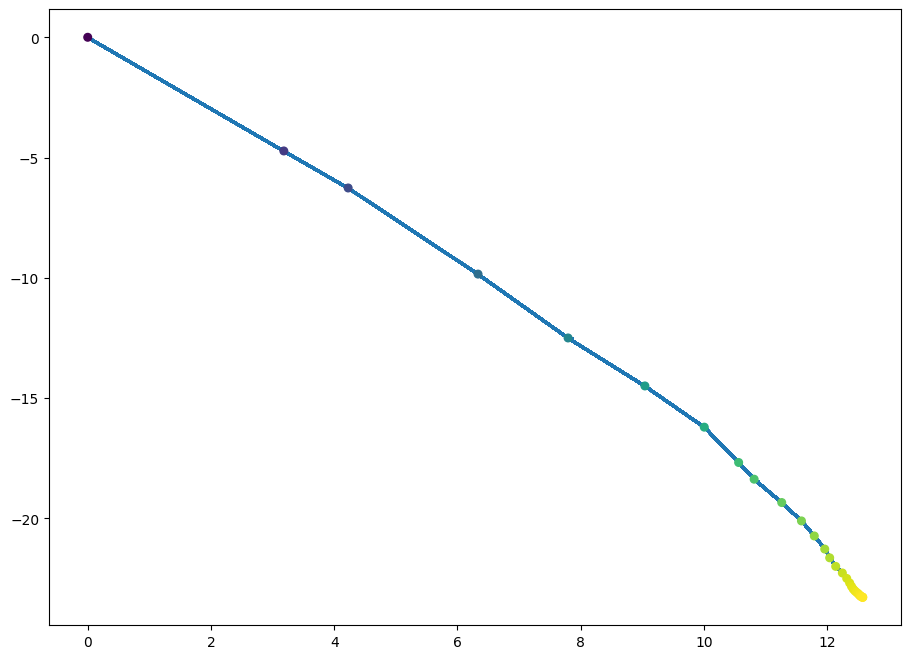

In [115]:
fig, ax = plt.subplots(figsize=(11,8))

ax.scatter(X_photons,Z_photons, s=0.2)
ax.scatter(np.array(X_muon)/10,np.array(Z_muon)/10, s=30, c=time_muon)

In [96]:
X_photons

ndarray([12.57531319, 12.57531402, 12.57531687, ...,  0.61673072,
          1.46206841,  0.3140321 ])

In [22]:
with open('/Users/alejandrosanchez/QpLSimulation/LightSimulation/ModelValidation/QPixSemiAnalytical/build/Output_new_scintillation_time.txt') as f:
    data = f.readlines()
    
for num in range(len(data)):
    data[num]=float(data[num].replace('\n',''))
    
with open('/Users/alejandrosanchez/QpLSimulation/LightSimulation/Geant4PixProduction/Dummy/DummyTest/build/ScintillationTime.txt') as f:
    time = f.readlines()
    
for num in range(len(time)):
    time[num]=float(time[num].replace(' The scintillation time is: ','').replace('\n',''))  
    

In [21]:
time[239678]

' The scintillation time is: 303.996'

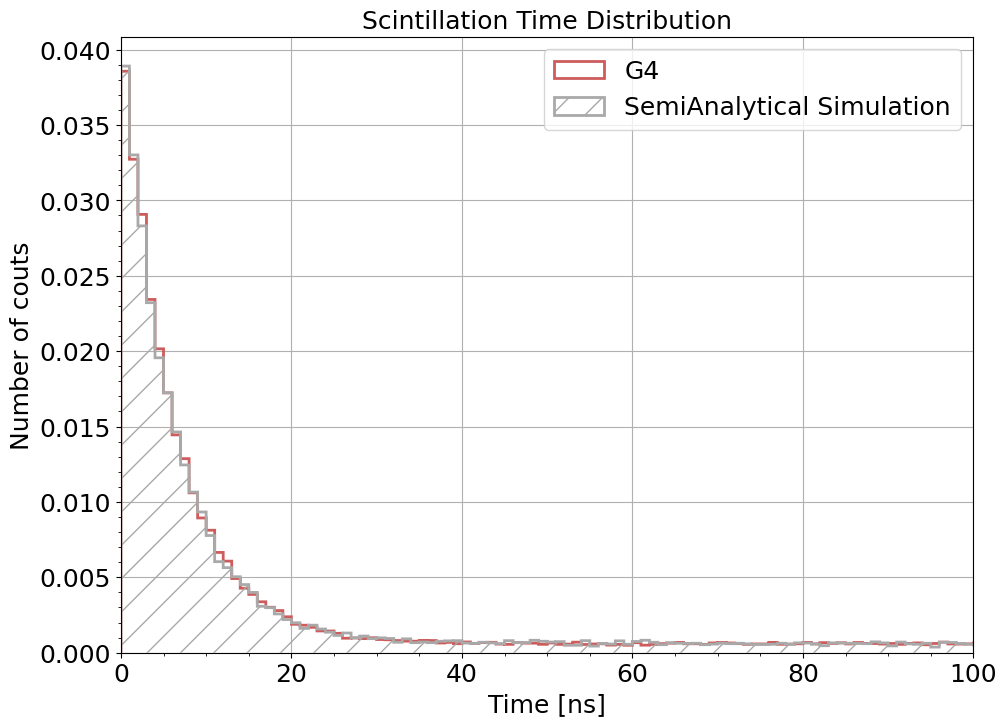

In [36]:
fig ,ax = plt.subplots(1, figsize=(11,8))

ax.hist(time, bins=3000,range=[0,3000], histtype='step', label='G4', lw=2, color='indianred', density=True)
ax.hist(data, bins=3000,range=[0,3000], histtype='step', label='SemiAnalytical Simulation', lw=2, color='darkgray', density=True, facecolor='darkgray', hatch='/', edgecolor='darkgray',fill=False)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.set_ylabel('Number of couts', fontsize=18)
ax.set_xlabel('Time [ns]', fontsize=18)
ax.set_title('Scintillation Time Distribution',fontsize=18)
ax.set_xlim(0,100)
ax.grid()
#ax.set_yscale('log')
ax.legend(fontsize=18)

/var/folders/z1/rps0b1355t19p70fmvx5fdpw0000gp/T/ipykernel_13614/1032152197.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-x/par[0])*(1 - np.exp(-x/par[1]))/par[0]/par[0]*(par[0]+par[1])
/var/folders/z1/rps0b1355t19p70fmvx5fdpw0000gp/T/ipykernel_13614/1032152197.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(-x/par[0])*(1 - np.exp(-x/par[1]))/par[0]/par[0]*(par[0]+par[1])


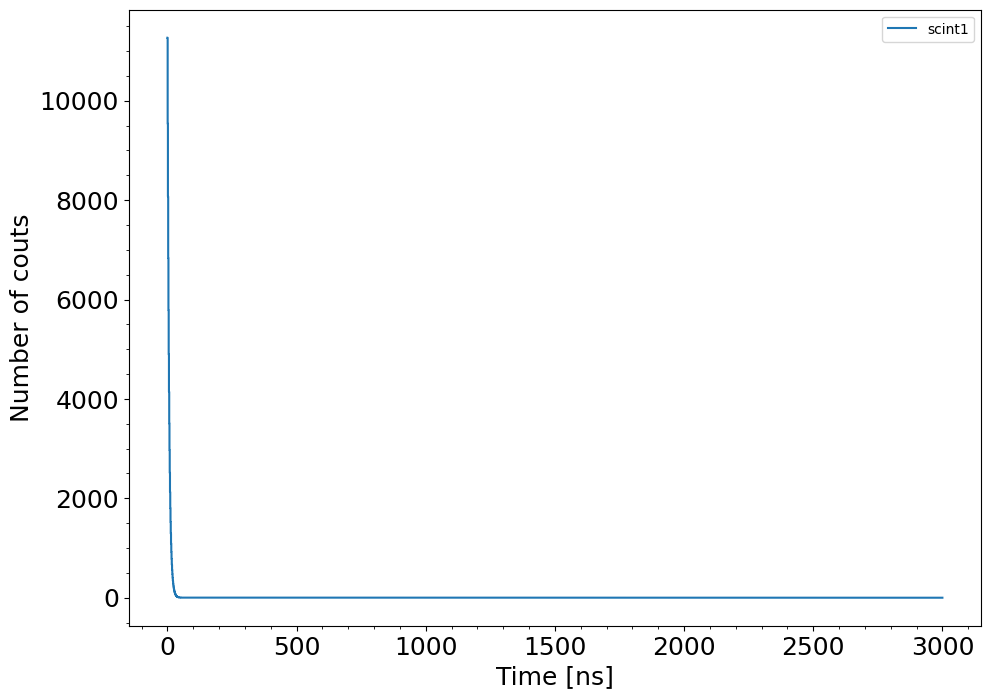

In [11]:
def Scintillation(x,par):
   return np.exp(-x/par[0])*(1 - np.exp(-x/par[1]))/par[0]/par[0]*(par[0]+par[1])

x=np.linspace(0,3000,3000)

scintpars=[6,0]

Scint_1=Scintillation(x,scintpars)

#scintpars=[.7,6,1300]

#Scint_2=Scintillation(x,scintpars)

fig, ax = plt.subplots(1,figsize=(11,8))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.set_ylabel('Number of couts', fontsize=18)
ax.set_xlabel('Time [ns]', fontsize=18)
ax.set_title('',fontsize=18)
#ax.set_xlim(0.,100)
ax.step(x,Scint_1*len(data), label='scint1')
#ax.step(x,Scint_2*len(data), label='scint2')
ax.legend()



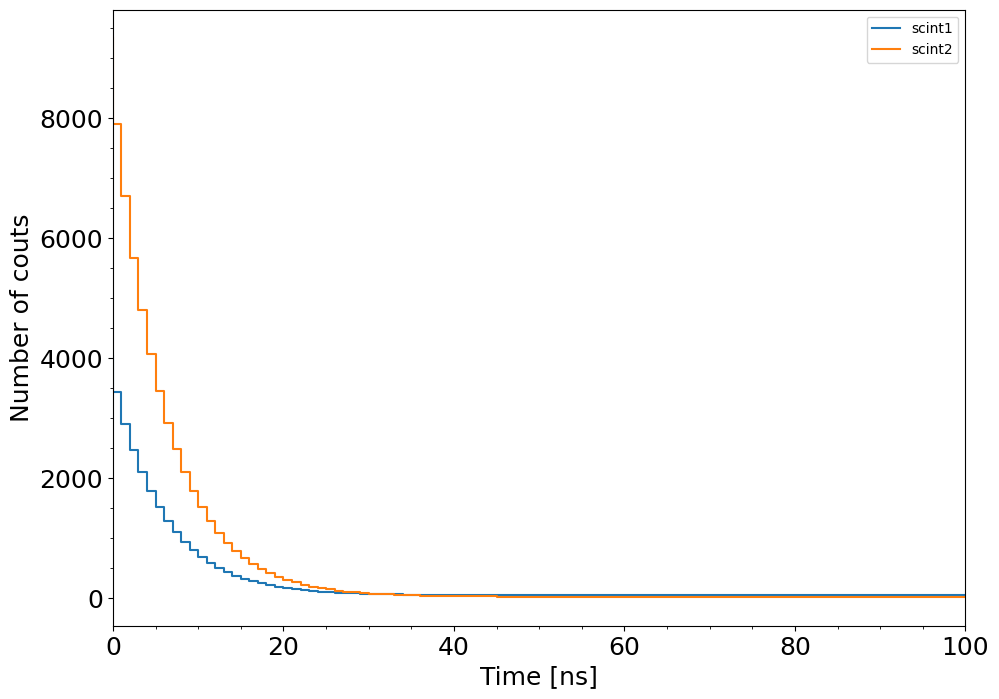

In [148]:
def Scintillation(x,par):
   return (par[0]/par[1])*np.exp(-(x/par[1]))+((1-par[0])/par[2])*np.exp(-(x/par[2]))


x=np.linspace(0,3000,3000)

scintpars=[.3,6,1300]

Scint_1=Scintillation(x,scintpars)

scintpars=[.7,6,1300]

Scint_2=Scintillation(x,scintpars)

fig, ax = plt.subplots(1,figsize=(11,8))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.set_ylabel('Number of couts', fontsize=18)
ax.set_xlabel('Time [ns]', fontsize=18)
ax.set_title('',fontsize=18)
ax.set_xlim(0.,100)
ax.step(x,Scint_1*len(data), label='scint1')
ax.step(x,Scint_2*len(data), label='scint2')
ax.legend()

Text(0.5, 1.0, 'Scintillation Time Distribution')

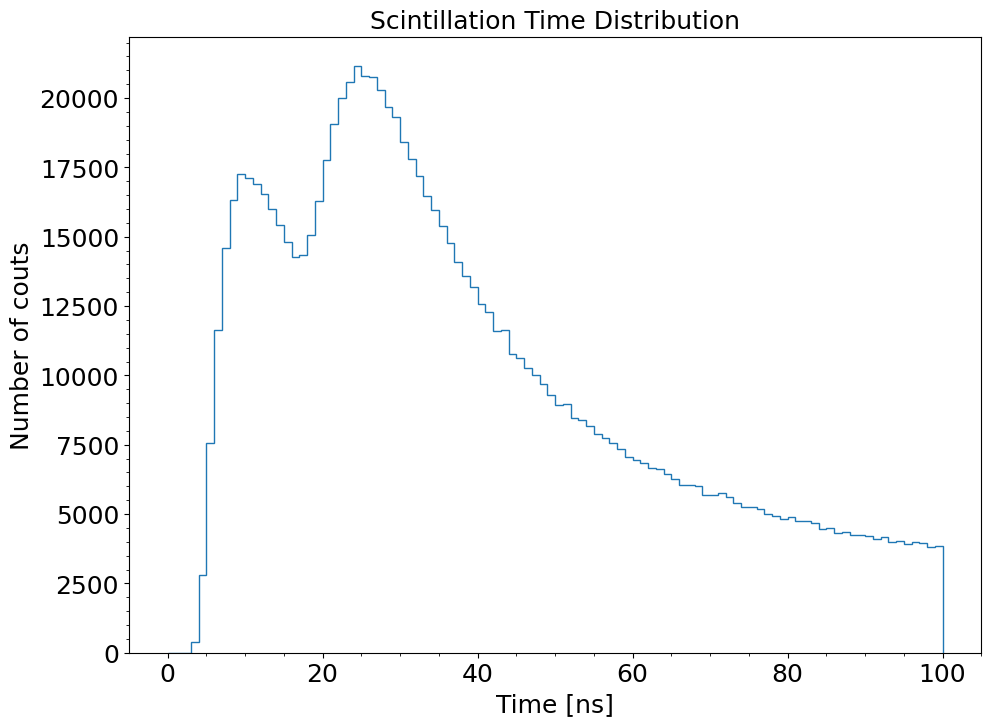

In [62]:
filename='/Users/alejandrosanchez/QpLSimulation/LightSimulation/ModelValidation/NewTiming/build/KDecay/G4/output3.root'

input_file = uproot.open(filename)

times= np.array(input_file['Photons']['Time_step'])

time_range=100

fig, ax = plt.subplots(1, figsize=(11,8))

ax.hist(times, histtype='step', range=[0,time_range], bins=time_range)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.set_ylabel('Number of couts', fontsize=18)
ax.set_xlabel('Time [ns]', fontsize=18)
ax.set_title('Scintillation Time Distribution',fontsize=18)



In [68]:

treeName = 'event;1'

d = ROOT.RDataFrame(treeName, filename)    

    
def ReadDataFrame(dataframe, label,cut=''):
    #dataframe=dataframe.Filter(cut)
    data= dataframe.AsNumpy(columns=[label])
    return data[label] 

branchname='hit_energy_deposit'
edep= ReadDataFrame(d, branchname, '')
branchname='hit_start_x'
X= ReadDataFrame(d, branchname, '')
branchname='hit_start_y'
Y= ReadDataFrame(d, branchname, '')
branchname='hit_start_z'
Z= ReadDataFrame(d, branchname, '')
branchname='hit_start_t'
time= ReadDataFrame(d, branchname, '')
branchname='pdg'
pdg= ReadDataFrame(d, branchname, '')

X_electron=[]
Z_electron=[]
edep_electron=[]
time_electron=[]

X_muon=[]
Z_muon=[]
edep_muon=[]
time_muon=[]

X_kaon=[]
Z_kaon=[]
edep_kaon=[]
time_kaon=[]

X_pionplus=[]
Z_pionplus=[]
edep_pionplus=[]
time_pionplus=[]

X_pionzero=[]
Z_pionzero=[]
edep_pionzero=[]
time_pionzero=[]

for num in range(len(pdg)):
    if(pdg[num]==-11 or pdg[num]==11):
        X_electron.append(X[num])
        Z_electron.append(Z[num])
        edep_electron.append(edep[num])
        time_electron.append(time[num])

    elif(pdg[num]==-13 or pdg[num]==13):
        X_muon.append(X[num])
        Z_muon.append(Z[num])
        edep_muon.append(edep[num])
        time_muon.append(time[num])
    elif(pdg[num]==321):
        X_kaon.append(X[num])
        Z_kaon.append(Z[num])
        edep_kaon.append(edep[num])
        time_kaon.append(time[num])
    elif(pdg[num]==211):
        X_pionplus.append(X[num])
        Z_pionplus.append(Z[num])
        edep_pionplus.append(edep[num])
        time_pionplus.append(time[num])
    elif(pdg[num]==111):
        X_pionzero.append(X[num])
        Z_pionzero.append(Z[num])
        edep_pionzero.append(edep[num])
        time_pionzero.append(time[num])


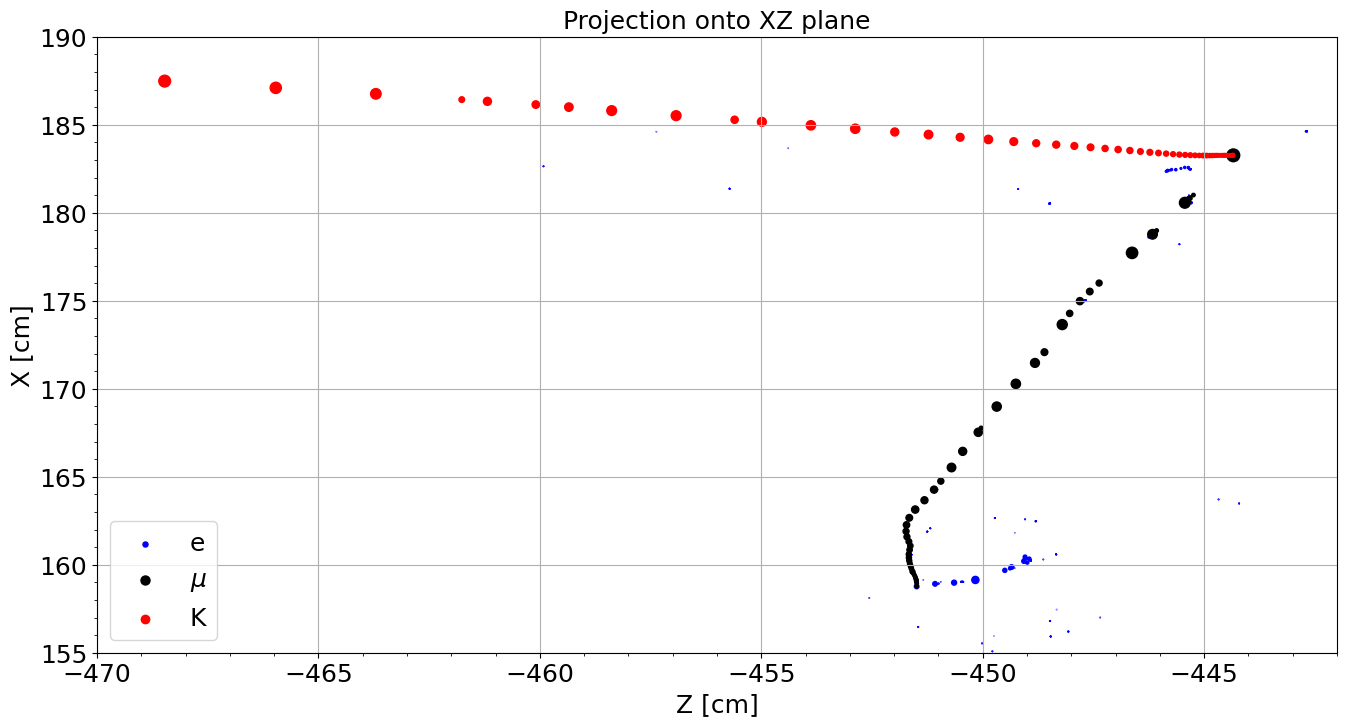

In [75]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(Z_electron,X_electron, s=np.array(edep_electron)*8, label='e', color='blue')
ax.scatter(Z_muon,X_muon, s=np.array(edep_muon)*8, label=r'${\mu}$', color='black')
ax.scatter(Z_kaon,X_kaon, s=np.array(edep_kaon)*8, label=r'K', color='red')
#ax.scatter(Z_pionplus,X_pionplus, s=np.array(edep_pionplus)*2, label='${\pi+}$')
#ax.scatter(Z_pionzero,X_pionzero, s=200, label='${\pi0}$', color='green')

#ax.scatter(X_photons,Z_photons, s=2)

#ax.scatter(X_photons_unlim,Z_photons_unlim, s=2)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title('Projection onto XZ plane', fontsize=18)
ax.minorticks_on()
ax.set_ylabel('X [cm]',fontsize=18)
ax.set_xlabel('Z [cm]',fontsize=18)
ax.set_xlim(-470,-442)
ax.set_ylim(155,190)

#ax.set_ylim(-190,-178)

ax.legend(fontsize=18)

In [65]:
pdg = np.array(input_file['event']['pdg'])
set(pdg)

{-14, -13, -11, 11, 12, 14, 22, 321, 1000180400}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


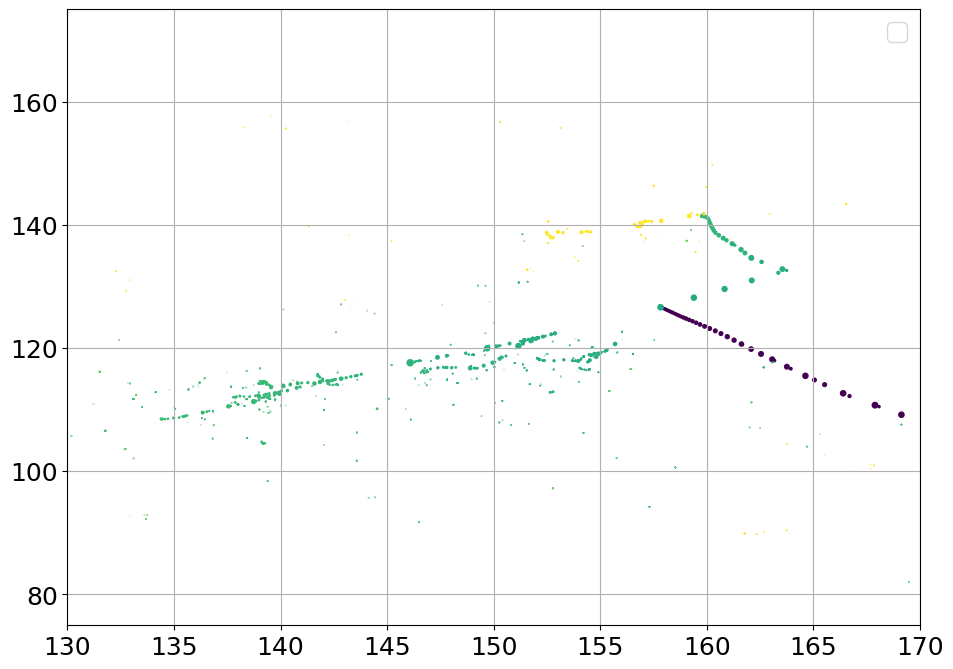

In [57]:
fig, ax = plt.subplots(figsize=(11,8))

ax.scatter(Z,X, s=np.array(edep)*2,c=time, vmin=40, vmax=60)

#ax.scatter(X_photons,Z_photons, s=2)

#ax.scatter(X_photons_unlim,Z_photons_unlim, s=2)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlim(130,170)

ax.set_ylim(75,175)

ax.legend(fontsize=18)

In [26]:
clist=[]

for num in range(len(pdg)):
    if(pdg[num]==-13 or pdg[num]==13):
        clist.append('indianred')
    elif(pdg[num]==-11 or pdg[num]==11):
        clist.append('blue')
    elif(pdg[num]==321):
        clist.append('black')
    elif(pdg[num]==211 or pdg[num]==111):
        clist.append('green')
    else:
        append(None)
        

(0.0, 100.0)

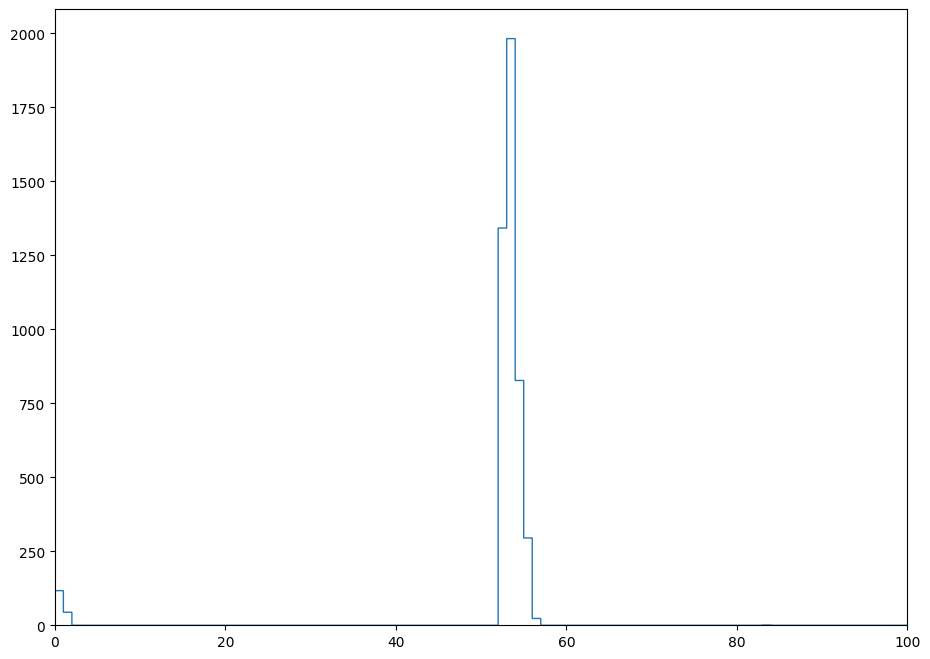

In [56]:
fig, ax = plt.subplots(1, figsize=(11,8))

ax.hist(time, histtype='step', bins=2000,range=[0,2000])
ax.set_xlim(0,100)

In [58]:
set(pdg)

{-14, -13, -11, 11, 12, 14, 22, 111, 211, 321, 1000180400}

In [90]:
number=-1

for num in range(0,10):
    number=num
    command=f'./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_{number}.root -o OutputValidation_stopping_muon_{number}.root'
    print(command)


./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_0.root -o OutputValidation_stopping_muon_0.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_1.root -o OutputValidation_stopping_muon_1.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_2.root -o OutputValidation_stopping_muon_2.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_3.root -o OutputValidation_stopping_muon_3.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_4.root -o OutputValidation_stopping_muon_4.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_5.root -o OutputValidation_stopping_muon_5.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelValidation_stopping_muon_6.root -o OutputValidation_stopping_muon_6.root
./OpticalSimulation -i StoppingMuon/Input/SemiAnalyticalModelV